![SCAN-Unit](img/scan-unit-logo.png "SCAN-Unit")

# SCAN-Unit Data Science Dojo

# Chapter 2. Tabular Data

Working with tables is essential for data analysis. Pandas data frames are very helpful for working with tables in Python. In this chapter we are going to learn how we import tables and do some simple data analyses.

**Pandas Package Overview**: https://pandas.pydata.org/docs/getting_started/overview.html

**Getting started with Pandas**: https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html

Questions answered in this tutorial:
+ How do I handle my data in pandas?
+ How do I create plots with matplotlib?
+ How do I calculate summary statistics?

The example data provided in the tutorials above is accessible via GitHub. To download the data, you have to display the raw data on the website and just save it with a right-click. It will be stored as a so called .csv-file (a comma separated values file), which is ready to use with pandas and matplotlib.

In this article you can learn more about data formats: https://towardsdatascience.com/gather-your-data-the-common-ones-6086ed04b905




<!--img src="img/github_raw2.png" /> <img src="img/github_raw1.png" style="width:340px;height:275px"/-->

**T-test using Python and Scipy**:


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

https://www.youtube.com/watch?v=ZR6bf8_s-hw


Questions answered in this tutorial:
+ How to perform a 2 sample t-test


# Exercise 1. Simple statistic.

Find the attached file called _chapter2_baseline-lidcombe.xlsx_.

The file contains a data set in which two therapies [“Lidcombe” and “TAU” (treatment as usual)] were performed on a sample.  Use the things you have learned so far to:

1. Split the data set into data frames for every treatment.
2. Create a quick summary statistic and plot diagrams to get an overview of the effects of the two treatments.
2. Find out if there is a significant difference between the therapies at EOT (end of treatment) using a simple t-test.


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Code here

## Solution

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

lidcombe = pd.read_excel("chapter2_baseline-lidcombe.xlsx")

lidcombe

,ID,Sex,AgeM,T0,Therapy,Fidel,EOT,FU
0,2,F,71,6.3,Lidcombe,71,2.1,0.7
1,3,F,33,3.7,Lidcombe,60,0.0,0.0
2,4,M,36,6.1,TAU,77,0.0,3.3
3,5,M,57,9.9,TAU,64,6.7,7.9
4,6,M,64,7.0,TAU,89,1.2,4.3
...,...,...,...,...,...,...,...,...
88,114,M,64,5.4,Lidcombe,32,3.0,2.4
89,115,M,36,7.3,Lidcombe,74,0.3,2.2
90,116,F,72,6.0,TAU,85,0.0,0.0
91,117,M,73,8.7,TAU,70,5.3,2.9


In [5]:
th_lid = lidcombe[lidcombe["Therapy"] == "Lidcombe"]
eot_lid = th_lid["EOT"]

th_tau = lidcombe[lidcombe["Therapy"] == "TAU"]
eot_tau = th_tau["EOT"]

eot_tau.describe()
eot_lid.describe()

count    43.000000
mean      1.516279
std       2.136968
min       0.000000
25%       0.000000
50%       0.600000
75%       2.200000
max       9.700000
Name: EOT, dtype: float64

EOT    AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

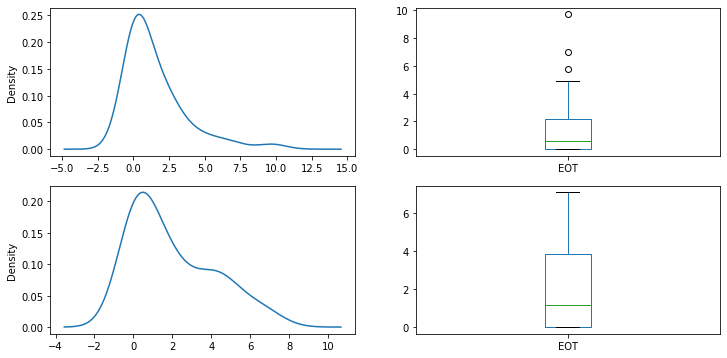

In [6]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12,6))

eot_lid.plot.density(ax = axes[0,0], subplots=True)
eot_tau.plot.density(ax = axes[1,0], subplots=True)

eot_lid.plot.box(ax = axes[0,1], subplots=True)
eot_tau.plot.box(ax = axes[1,1], subplots=True)

In [ ]:
t, p = stats.ttest_ind(eot_lid , eot_tau)

print("t = " + str(t))
print("p = " + str(p))

t = -1.0768738337403034
p = 0.28438320816635687


# Exercise 2. Plotting some COVID-19 Data.

We want to do the following things:
    
1. Load some updated COVID-19 Data
2. Plotting the confirmed cases
3. Calculating the moving average


First we take the raw data provided by the John Hopkins University on GitHub. This way we get a data set that will be updated every day. 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

confirmed_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
country_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

# Code here

## Solution. Load some updated COVID-19 Data

Load the data with `pd.read_csv()`. With the `print(df.shape)` command we can have a quick look on how our data frames are built.

In [ ]:
confirmed_df = pd.read_csv(confirmed_cases_file_link)
print(confirmed_df.shape)
deaths_df= pd.read_csv(death_cases_file_link)
print(deaths_df.shape)
recovered_df = pd.read_csv(recovered_cases_file_link)
print(recovered_df.shape)
cases_country_df = pd.read_csv(country_cases_file_link)
print(cases_country_df.shape)

(273, 370)
(273, 370)
(258, 370)
(192, 14)


To have a look at the columns our data frames consists of we can use the *df.columns* command. 

In [ ]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/20/20', '11/21/20', '11/22/20', '11/23/20', '11/24/20', '11/25/20',
       '11/26/20', '11/27/20', '11/28/20', '11/29/20'],
      dtype='object', length=317)

With our covid-19 data, we have the issue that multiple provinces and states of some countries are listed separately. This is for example the case with Australia. If we want to find out how many separate countries are listed in the dataframe we can use the *.nunique()* command after we assigned a column of interest. In this case we want to have a look at "Country/Region".

In [ ]:
confirmed_df["Country/Region"].nunique()

191

To display a summary of all rows in the dataframe, we can drop the columns we do not need and summarize the remaining columns with *.sum()*.

In [ ]:
global_data = cases_country_df.copy().drop(['Lat', 'Long_', 'Country_Region', 'Last_Update', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'Incident_Rate'], axis=1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary

,Confirmed,Deaths,Recovered,Active
0,62849187.0,1461376.0,40262998.0,21124810.0


Now let us create a time series out of our existing dataframe and summarize it to get a two dimensional dataframe.

Review what you can do with matplotlib here: https://matplotlib.org/tutorials/introductory/pyplot.html 

In [ ]:
# Code here


## Solution. Plotting the confirmed cases

In [ ]:
confirmed_ts = confirmed_df.copy().drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis = 1)
confirmed_ts_summary = confirmed_ts.sum()
confirmed_ts_summary

1/22/20          555
1/23/20          654
1/24/20          941
1/25/20         1434
1/26/20         2118
              ...   
11/25/20    60392453
11/26/20    60973650
11/27/20    61645535
11/28/20    62244181
11/29/20    62730726
Length: 313, dtype: int64

With this df we can plot a graph of the total global cases:

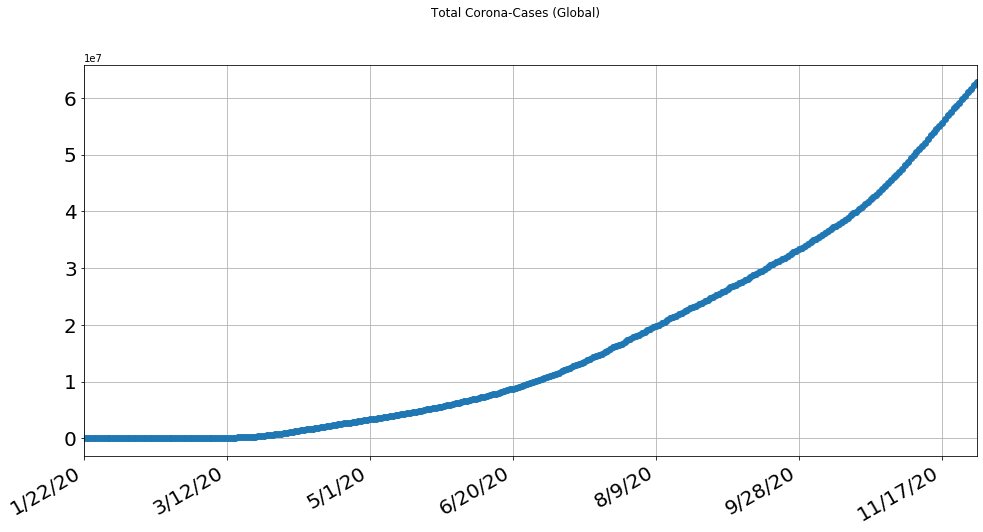

In [ ]:
fig_1 = confirmed_ts_summary.plot(figsize=(16, 8), subplots = True, title = 'Total Corona-Cases (Global)', grid = True, style='o-', fontsize=20,  )

## Improving our results

To create a graph that displays the currently active cases for a specific country, we have to think about how this data can be acquired from the resources we have at hand. We have: confirmed cases, deaths and recovered. To get the active cases we have simply subtract all deaths and recovered from confirmed cases. 

Let's start with defining our variables. To make it easier to display a certain country we can define a variable "country", so we don't have to change the countries name in every instant it occurs. Then we create a new variable for every df in which we select the country we want to display.

Now we can create another set of variables to reduce every time series to the columns we want. After that, we have to write our latest variables in a simple calculation, where we subtract them like we already thought about. Then we can plot the resulting df.

At last we can also print the number maximum active cases and current active cases above the plot.

Maximum active Cases: 77130
Current active Cases: 59605


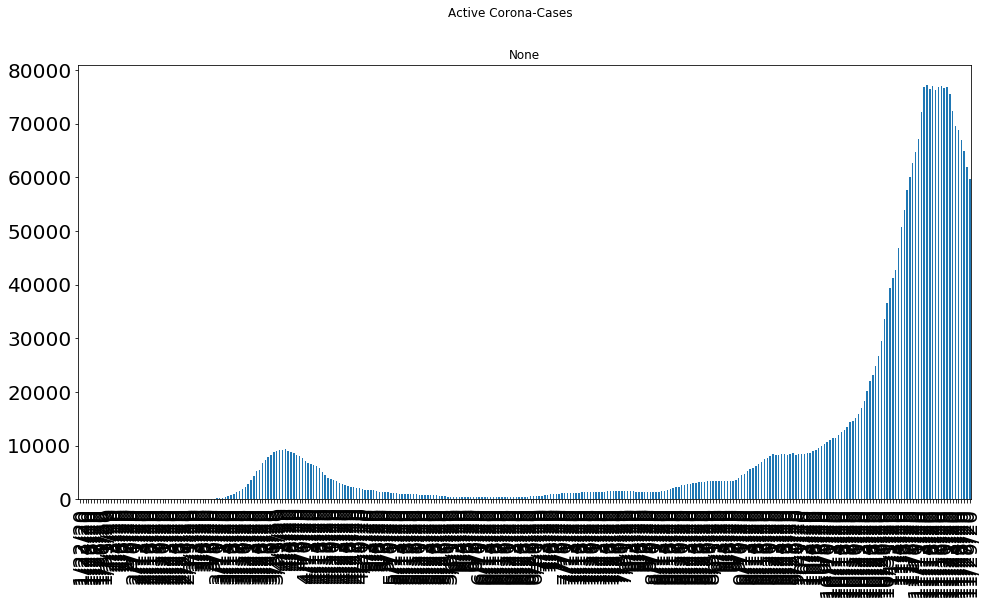

In [ ]:
country = "Austria"
confirmed_country_df = confirmed_df[confirmed_df['Country/Region'] == country]
deaths_country_df = deaths_df[deaths_df['Country/Region'] == country]
recovered_country_df = recovered_df[recovered_df['Country/Region'] == country]

confirmed_agg_country_ts = confirmed_country_df.copy().drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis=1).sum()
deaths_agg_country_ts = deaths_country_df.copy().drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis=1).sum()
recovered_agg_country_ts = recovered_country_df.copy().drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis=1).sum()

active_agg_country_ts = confirmed_agg_country_ts - deaths_agg_country_ts - recovered_agg_country_ts
active_agg_country_ts.plot.bar(figsize=(16, 8), subplots = True, title = 'Active Corona-Cases', grid = False, style='o-', fontsize=20)
print("Maximum active Cases:",  active_agg_country_ts.max())
print("Current active Cases:",  active_agg_country_ts.iloc[-1])

How would you get the axis labels fixed so they look more beautiful?

Check out this tutorial: https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm

In [ ]:
# Code here

## Moving Average of Confirmed Cases

Now let's do something a little bit more tricky. What if we want to display the daily new cases with a second line that displays the moving average of the last 7 days on each day?



In [ ]:
# Code here


## Solution. Moving average

The most important thing is to break down the problem into small steps. So first of all we start by selecting the confirmed cases df, drop the columns we don't need out of a copy and  use the `.values[0]`  command to display only the values.

In [ ]:
ts_sum = confirmed_country_df.copy().drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis=1).values[0]
ts_sum

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      2,      2,      3,      3,      9,     14,
           18,     21,     29,     41,     55,     79,    104,    131,
          182,    246,    302,    504,    655,    860,   1018,   1332,
         1646,   2013,   2388,   2814,   3582,   4474,   5283,   5588,
         6909,   7657,   8271,   8788,   9618,  10180,  10711,  11129,
        11524,  11781,  12051,  12297,  12639,  12942,  13244,  13555,
        13806,  13945,  14041,  14226,  14336,  14476,  14595,  14671,
        14749,  14795,  14873,  14925,  15002,  15071,  15148,  15225,
        15274,  15357,  15402,  15452,  15531,  15558,  15597,  15621,
        15650,  15684,  15752,  15774,  15833,  15871,  15882,  15961,
      

Let's have a quick look at the time series we just created.

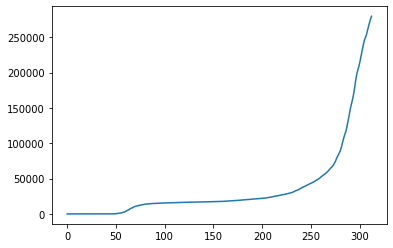

In [ ]:
plt.plot(ts_sum)

To get a time series of the new cases we subtract $ts[n-1]$ from $ts[n]$. To do that, we just take the same variable *ts_new* and assign different locations for the start and endpoints of the df.

Then we can plot it to have a look at the outcome.

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          2,    0,    1,    0,    6,    5,    4,    3,    8,   12,   14,
         24,   25,   27,   51,   64,   56,  202,  151,  205,  158,  314,
        314,  367,  375,  426,  768,  892,  809,  305, 1321,  748,  614,
        517,  830,  562,  531,  418,  395,  257,  270,  246,  342,  303,
        302,  311,  251,  139,   96,  185,  110,  140,  119,   76,   78,
         46,   78,   52,   77,   69,   77,   77,   49,   83,   45,   50,
         79,   27,   39,   24,   29,   34,   68,   22,   59,   38,   11,
         79,   36,   61,   51,   92,   41,   27,   52,   32,   51,   32,
         50,   17,   36,   18,   34,   37,   27,   30,   46,    2,   26,
         12,   34,   38,   55,    4,   66,   11,   26,   29,   30,   14,
         31,   26,   54,   14,   20,   48,   52,   

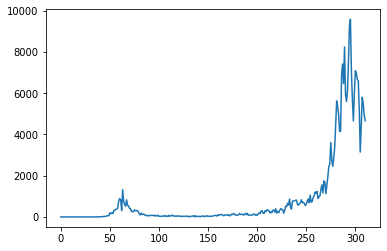

In [ ]:
ts_new = ts_sum[1:-1] - ts_sum[0:-2]
plt.plot(ts_new)
ts_new

Now comes the tricky part. We have to create a loop to calculate the average of the last $n$ days. Remember that we work on problems like this first in the most simple way possible and the work our way up. So let's begin with a simple list.

In [ ]:
alist = np.arange(1,24)

for a in alist:
    print(a)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


We want to define a time window of 7 days and calculate the average. This means that the first 7 values will be a little bit tricky because we don't have 7 days of data at that time. Let's just set it to $0$ for now.

To do that we have to remember what we learned about loops. With the *enumerate()* command we can define an index and then set an *if*-condition to print 0 if the number of days is smaller than $n$ days.

In [ ]:
twin = 7
for day, a in enumerate(alist):
    if day<twin:
        print(0)
    else:
        print(a)

0
0
0
0
0
0
0
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


To calculate the value we need to calculate $\frac{(alist_{day} + alist_{day-1} + alist_{day-2} + ... + alist_{day-twin})}{twin}$.

So let us swap out the value a with our calculation.

In [ ]:
twin = 7
for day, a in enumerate(alist):
    if day<twin:
        print(0)
    else:
        print(alist[day-twin:day])

0
0
0
0
0
0
0
[1 2 3 4 5 6 7]
[2 3 4 5 6 7 8]
[3 4 5 6 7 8 9]
[ 4  5  6  7  8  9 10]
[ 5  6  7  8  9 10 11]
[ 6  7  8  9 10 11 12]
[ 7  8  9 10 11 12 13]
[ 8  9 10 11 12 13 14]
[ 9 10 11 12 13 14 15]
[10 11 12 13 14 15 16]
[11 12 13 14 15 16 17]
[12 13 14 15 16 17 18]
[13 14 15 16 17 18 19]
[14 15 16 17 18 19 20]
[15 16 17 18 19 20 21]
[16 17 18 19 20 21 22]


To display the average of the last $n$ days, we have to summarize the printed moving $n$ days and divide them by $n$.

In [ ]:
twin = 7
for day, a in enumerate(alist):
    if day<twin:
        print(0)
    else:
        print(np.sum(alist[day-twin:day]/twin))

0
0
0
0
0
0
0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
13.999999999999998
15.0
16.0
17.0
18.0
19.0


Now let's have a look at our *if* condition. For the first values where $day<twin$ we calculate the mean based on the existing data. 

To do that, we use *enumerate()* to divide the summary of a list of $n$ days through the number of values that list contains (using the *len()* function).

In [ ]:
twin = 7
for day, a in enumerate(alist):
    if day<twin:
        print(np.sum(alist[0:day])/(len(alist[0:day])))
    else:
        print(np.sum(alist[day-twin:day])/twin)

nan
1.0
1.5
2.0
2.5
3.0
3.5
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


Finally, we don't just want to print it but store it into a new list. We can do that by defining a variable for our list and swap out the *print()* command with our variable and the *.append()* command.

Now we can plot our list by using that variable.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


[nan,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0]

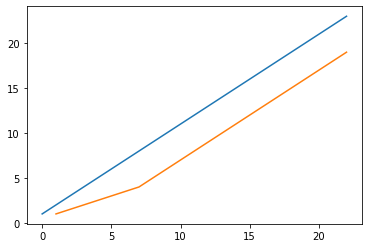

In [ ]:
twin = 7
alist_avg= []
for day, a in enumerate(alist):
    if day<twin:
       alist_avg.append(np.sum(alist[0:day])/(len(alist[0:day])))
    else:
       alist_avg.append(np.sum(alist[day-twin:day])/twin)

plt.plot(alist)
plt.plot(alist_avg)
alist_avg

At last we can try if our loop works with real data: let's set "alist" to "ts_new" and see what happens.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


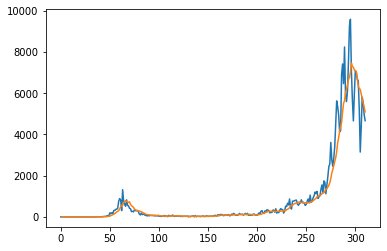

In [ ]:
alist = ts_new
twin = 7
alist_avg= []
for day, a in enumerate(alist):
    if day<twin:
       alist_avg.append(np.sum(alist[0:day])/(len(alist[0:day])))
    else:
       alist_avg.append(np.sum(alist[day-twin:day])/twin)

plt.plot(alist)
plt.plot(alist_avg)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


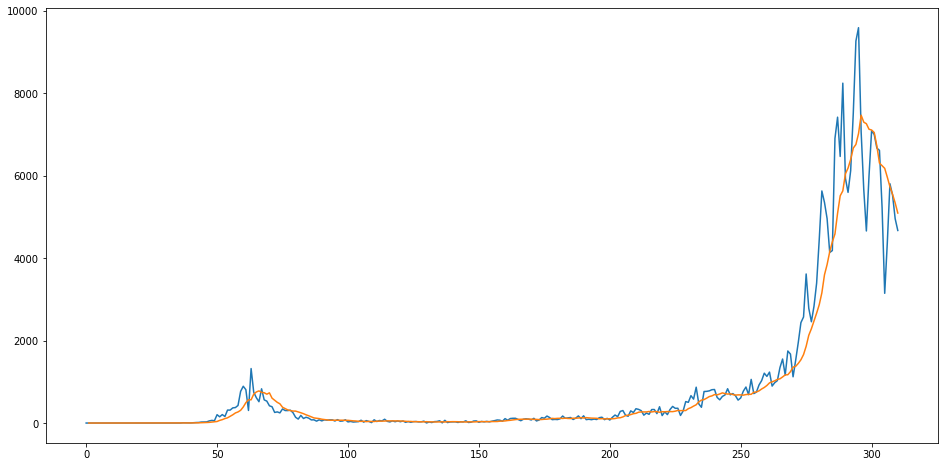

In [ ]:
alist = ts_new
twin = 7
alist_avg= []
for day, a in enumerate(alist):
    if day<twin:
       alist_avg.append(np.sum(alist[0:day])/(len(alist[0:day])))
    else:
       alist_avg.append(np.sum(alist[day-twin:day])/twin)

fig, new_avg = plt.subplots(figsize=(16,8))    
plt.plot(alist)
plt.plot(alist_avg)

Play around with this plot to make it more beautiful. Think about the following ideas.

- Can you combine the line chart (moving average) with a bar chart (daily)?
- Can you change the line styles, add grids, use a log-scale?
- Can you find a way to make the averaging function interactive (https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)?


In [ ]:
# Code here